In [1]:
# imports
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import sklearn
from tensorflow import keras
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential, model_from_json
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import random
import time

In [2]:
# loading samples
data = np.load('../../data/dataset.npz')
x = data['arr_0']
labels = data['arr_1']
y = keras.utils.to_categorical(labels, num_classes=9)

In [3]:
# sorting samples
sorted_x = [[] for i in range(8)]
for i in range(len(labels)):
    sorted_x[labels[i]-1].append(x[i])
for i in range(len(sorted_x)):
    sorted_x[i] = np.asarray(sorted_x[i])

In [4]:
# creating binary samples
first_label = 4
second_label = 8

half_x_1 = sorted_x[first_label-1]
half_x_2 = sorted_x[second_label-1]

binary_x = np.concatenate((half_x_1, half_x_2), axis=0)
binary_y = np.concatenate((np.asarray([0 for i in range(len(half_x_1))]), np.asarray([1 for i in range(len(half_x_2))])), axis=0)

In [5]:
# spliting samples into training and testing sets
# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1, random_state=42)
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(binary_x, binary_y, test_size=0.1, random_state=42)

In [6]:
# print(x.shape)
# print(binary_x.shape)
# print(labels.shape)
# print(y.shape)
# print(binary_y.shape)

# print(x)
# print(binary_x)
# print(labels[0:1000])
# print(y)
# print(binary_y)

# print(y.sum(0))
# print(binary_y.sum(0))

# print(x_train.shape)
# print(y_train.shape)
# print(y_train.sum(0))

# print(x_test.shape)
# print(y_test.shape)
# print(y_test.sum(0))

In [15]:
# creating model
model = Sequential()
model.add(Flatten(input_shape=x_train.shape[1:]))
# model.add(Dense(9, activation='softmax'))
model.add(Dense(1, activation='sigmoid'))

# model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 81920)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 81921     
Total params: 81,921
Trainable params: 81,921
Non-trainable params: 0
_________________________________________________________________


In [16]:
# training model
start = time.time()
history = model.fit(x_train, y_train, epochs=10)
accuracy_history = history.history['accuracy']
while (accuracy_history[-1] < 0.90):
    clear_output()
    history = model.fit(x_train, y_train, epochs=10)
    accuracy_history += history.history['accuracy']
clear_output()
end = time.time()
print('timer:', end - start) 

timer: 228.55585718154907


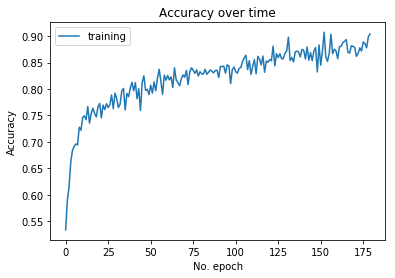

In [17]:
# displaying evolution of accuracy over training
plt.plot(accuracy_history, label='training')
plt.title('Accuracy over time')
plt.ylabel('Accuracy')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [18]:
# evaluating score
score = model.evaluate(x_test, y_test)
clear_output()
print("loss     :", score[0])
print("accuracy :", score[1])

loss     : 51.36146072387695
accuracy : 0.8


In [19]:
# evaluating score for each genre
# accuracies = []
# for i in range(8):
#     label_tmp = np.asarray([0 for j in range(9)])
#     label_tmp[i+1] = 1
#     x_test_tmp = []
#     y_test_tmp = []
#     for k in range(len(y_test)):
#         if(np.array_equal(y_test[k], label_tmp)):
#             x_test_tmp.append(x_test[k])
#             y_test_tmp.append(y_test[k])
#     score_tmp = model.evaluate(np.asarray(x_test_tmp), np.asarray(y_test_tmp))
#     clear_output()
#     accuracies.append(score_tmp[1])
    
# print(accuracies)        

In [20]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Saved model to disk
Loaded model from disk
